**Analyze marketing spend across different channels (Google Ads, Meta Ads, Email, Influencer, etc.) to determine which ones generate the best ROI.**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
#Loading CSV files
spend_df = pd.read_csv("/content/drive/MyDrive/Datasets/marketing_spend.csv")
sales_df =  pd.read_csv("/content/drive/MyDrive/Datasets/sales_performance.csv")

In [ ]:
#Merging the pdf for better info
merged_df = pd.merge(spend_df,sales_df,on=['Date','Channel'])

In [ ]:
# Checking Columns in merged dataframe
print(merged_df.columns)

#calculating KPIs
merged_df['Cost per Lead (CPL)'] = merged_df['Spend ($)'] / merged_df['Leads']
merged_df['Cost per Acquisition (CPA)'] = merged_df['Spend ($)'] / merged_df['Conversions']
merged_df['Conversion Rate (%)'] = (merged_df['Conversions'] / merged_df['Leads']) * 100
merged_df['ROAS'] = merged_df['Revenue ($)'] / merged_df['Spend ($)']


Index(['Date', 'Channel', 'Campaign Name', 'Spend ($)', 'Leads', 'Conversions',
       'Revenue ($)', 'Cost per Lead (CPL)', 'Cost per Acquisition (CPA)',
       'Conversion Rate (%)', 'ROAS'],
      dtype='object')
         Date       Channel          Campaign Name  Spend ($)  Leads  \
0  2024-12-01    Google Ads      Google Campaign 3       1360    376   
1  2024-12-01      Meta Ads        Meta Campaign 1       4272    853   
2  2024-12-01         Email       Email Campaign 3        966    494   
3  2024-12-01    Influencer  Influencer Campaign 3       4926    763   
4  2024-12-01  LinkedIn Ads    LinkedIn Campaign 4       3944    175   

   Conversions  Revenue ($)  Cost per Lead (CPL)  Cost per Acquisition (CPA)  \
0           74        13394             3.617021                   18.378378   
1           90         6120             5.008206                   47.466667   
2           52         7280             1.955466                   18.576923   
3          141        12408    

In [ ]:
#Checking Result
print(merged_df.head())

         Date       Channel          Campaign Name  Spend ($)  Leads  \
0  2024-12-01    Google Ads      Google Campaign 3       1360    376   
1  2024-12-01      Meta Ads        Meta Campaign 1       4272    853   
2  2024-12-01         Email       Email Campaign 3        966    494   
3  2024-12-01    Influencer  Influencer Campaign 3       4926    763   
4  2024-12-01  LinkedIn Ads    LinkedIn Campaign 4       3944    175   

   Conversions  Revenue ($)  Cost per Lead (CPL)  Cost per Acquisition (CPA)  \
0           74        13394             3.617021                   18.378378   
1           90         6120             5.008206                   47.466667   
2           52         7280             1.955466                   18.576923   
3          141        12408             6.456094                   34.936170   
4           21         3990            22.537143                  187.809524   

   Conversion Rate (%)      ROAS  
0            19.680851  9.848529  
1            10.

In [ ]:
#Exporting combined Dataframe For making Dashboad
merged_df.to_csv("marketing_roi_analysis.csv",index = False)

In [ ]:
# Downloading the dataframe
from google.colab import files
files.download("marketing_roi_analysis.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Extending Analysis  bit further**

In [ ]:
channel_summary = merged_df.groupby('Channel').agg({
    'Spend ($)': 'sum',
    'Leads': 'sum',
    'Conversions': 'sum',
    'Revenue ($)': 'sum'
}).reset_index()


In [ ]:
# Recalculate KPIs
channel_summary['CPL'] = channel_summary['Spend ($)'] / channel_summary['Leads']
channel_summary['CPA'] = channel_summary['Spend ($)'] / channel_summary['Conversions']
channel_summary['ROAS'] = channel_summary['Revenue ($)'] / channel_summary['Spend ($)']
channel_summary['Conversion Rate (%)'] = (channel_summary['Conversions'] / channel_summary['Leads']) * 100

print(channel_summary)

        Channel  Spend ($)  Leads  Conversions  Revenue ($)       CPL  \
0         Email     173856  28298         3384       424393  6.143756   
1    Google Ads     178244  32815         4101       533820  5.431784   
2    Influencer     174848  31188         3599       406117  5.606259   
3  LinkedIn Ads     162868  31087         4002       506408  5.239103   
4      Meta Ads     169874  27447         3406       428273  6.189165   

         CPA      ROAS  Conversion Rate (%)  
0  51.375887  2.441060            11.958442  
1  43.463545  2.994883            12.497334  
2  48.582384  2.322686            11.539695  
3  40.696652  3.109316            12.873548  
4  49.874927  2.521122            12.409371  


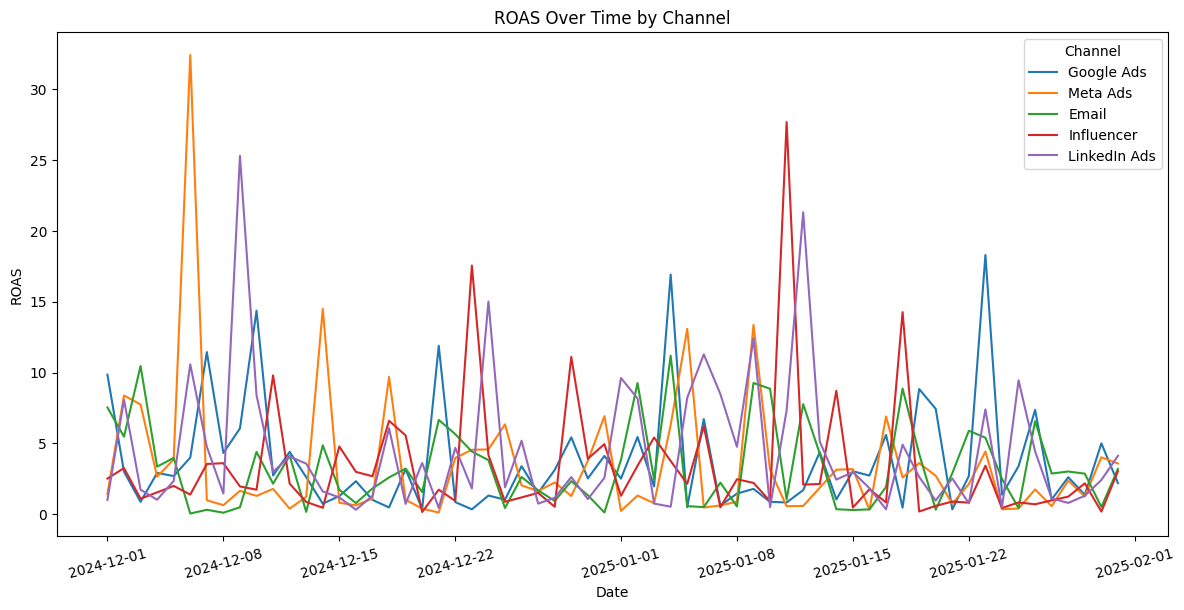

In [ ]:
#Plotting ROAS CPA or Revenue change over time

#converting date column
merged_df['Date'] = pd.to_datetime(merged_df['Date'])

#plotting ROAS
plt.figure(figsize=(12,6))
sns.lineplot(x='Date',y='ROAS',hue='Channel',data=merged_df)
plt.title('ROAS Over Time by Channel')
plt.xlabel('Date')
plt.ylabel('ROAS')
plt.tight_layout()
plt.xticks(rotation = 15)
plt.show()

**Best & Worst Days**

In [ ]:
top_days = merged_df.sort_values(by = 'ROAS' ,ascending=False).head(5)
worst_days = merged_df.sort_values(by='ROAS').head(5)

print("Top 5 ROAS days:\n",top_days[['Date','Channel', 'ROAS']])
print("\nWorst 5 ROAS days:\n",worst_days[['Date','Channel','ROAS']])

Top 5 ROAS days:
           Date       Channel       ROAS
26  2024-12-06      Meta Ads  32.410256
208 2025-01-11    Influencer  27.678571
44  2024-12-09  LinkedIn Ads  25.295102
214 2025-01-12  LinkedIn Ads  21.311793
265 2025-01-23    Google Ads  18.298246

Worst 5 ROAS days:
           Date     Channel      ROAS
27  2024-12-06       Email  0.049338
37  2024-12-08       Email  0.109832
101 2024-12-21    Meta Ads  0.121384
152 2024-12-31       Email  0.124861
98  2024-12-20  Influencer  0.156367


**Checking Correlations**

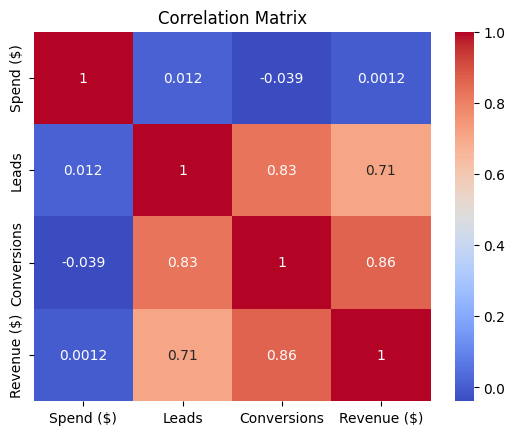

In [ ]:
#Finding Relationships between spending conversions and revenue

corr =  merged_df[['Spend ($)','Leads','Conversions','Revenue ($)']].corr()
sns.heatmap(corr, annot = True , cmap = 'coolwarm')
plt.title("Correlation Matrix")
plt.show()

''' As visible in the below graph we have stong correlation between Conversions and leads and Conversions and Revenue
    SO we can Conclude on the basis of leads we are able to do good conersions on the lead.
    And on the basis of that conversion , a good amount of revenue is generated '''